### Prerequesites

In [9]:
import os
from datetime import date
from Classfile import *
from pre_processing import case_study_names, case_study_dfs
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# output paths
main = "/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Isochrone_Archive/Coding/"
subdir = date.today()
output_path = os.path.join(main, str(subdir))
try:
    os.mkdir(output_path)
except FileExistsError:
    pass
output_path = output_path + "/"

data_path = "/Users/alena/PycharmProjects/PaperI/"
HP_file = data_path + "data/Hyperparameters/Case_studies_with_errors.csv"
try:
    pd.read_csv(HP_file)
except FileNotFoundError:
    with open(HP_file, "w") as f:
        f.write("id,name,abs_mag,cax,score,std,C,epsilon,gamma,kernel\n")

In [2]:
bhac = data_path + "data/Isochrones/BHAC15/baraffe15.csv"

sns.set_style("darkgrid")
colors = ["red", "darkorange"]
kwargs = dict(grid=None, HP_file=HP_file)
save_plot = True

### Cluster data import

In [3]:
# Pleiades
Pleiades_cluster, Pleiades_df = case_study_names[0], case_study_dfs[0]
Pleiades_filtered_df = Pleiades_df[Pleiades_df["imag"] > 13]

# IC 4665
IC4665_cluster, IC4665_df = case_study_names[1], case_study_dfs[1]
IC4665_filtered_df = IC4665_df[(IC4665_df["imag"] > 13)]
N_df = pd.concat([Pleiades_filtered_df, IC4665_filtered_df], axis=0)

## 1. Generation of the isochrones

In [7]:
# store cluster objects for later
OCs = []
for i, cluster in enumerate(case_study_names[:]):

    OC = star_cluster(cluster, N_df)
    deltas = OC.create_CMD(CMD_params=["imag", "imag", "Kmag"], return_errors=True)

    # 3. Do some initial HP tuning if necessary
    try:
        params = OC.SVR_read_from_file(HP_file)
    except IndexError:
        curve, isochrone = OC.curve_extraction(OC.PCA_XY, **kwargs)

    # 4. Create the robust isochrone and uncertainty border from bootstrapped curves
    n_boot = 1000
    result_df = OC.isochrone_and_intervals(n_boot=n_boot, kwargs=kwargs)

    setattr(OC,"isochrone",result_df[["m_x","m_y"]])
    setattr(OC,"upper",result_df[["u_x","u_y"]])
    setattr(OC,"lower",result_df[["l_x","l_y"]])

    OCs.append(OC)

Keyerror, plx errors are missing!!
35.03415489196777 s parallel
Keyerror, plx errors are missing!!
18.207489252090454 s parallel


### Result plot

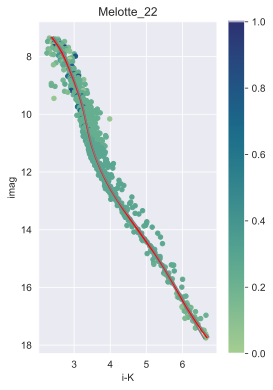

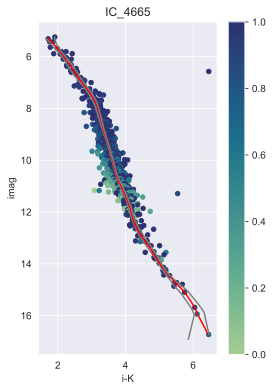

In [11]:
cm = plt.cm.get_cmap("crest")

for OC in OCs:
    fig1 = plt.figure(figsize=(4, 6))
    ax1 = plt.subplot2grid((1, 1), (0, 0))

    sc = ax1.scatter(OC.CMD[:, 0], OC.CMD[:, 1], label=OC.name, c=OC.weights, cmap=cm, s=20)
    ax1.plot(OC.lower["l_x"], OC.lower["l_y"], color="grey", label="5. perc")
    ax1.plot(OC.isochrone["m_x"], OC.isochrone["m_y"], color="red", label="Isochrone")
    ax1.plot(OC.upper["u_x"], OC.upper["u_y"], color="grey", label="95. perc")
    plt.colorbar(sc)
    ymin, ymax = ax1.get_ylim()
    ax1.set_ylim(ymax, ymin)
    ax1.set_ylabel(OC.CMD_specs["axes"][0])
    ax1.set_xlabel(OC.CMD_specs["axes"][1])
    ax1.set_title(OC.name)
    # if save_plot:
    #     fig1.savefig(output_path+"{}_isochrone_errormap.png".format(OC.name),dpi=500)

### Weight and error plot

Keyerror, plx errors are missing!!
Keyerror, plx errors are missing!!


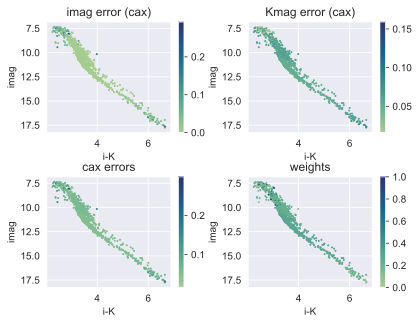

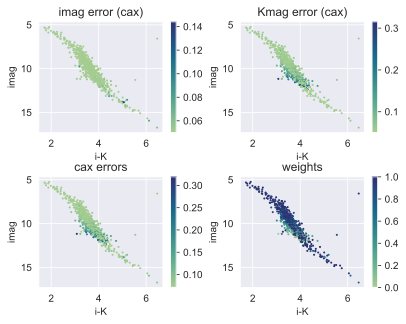

In [12]:
for OC in OCs:

    deltas = OC.create_CMD(CMD_params=["imag", "imag", "Kmag"], return_errors=True)

    error_fig = plt.figure()

    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), sharex = )
    ax3 = plt.subplot2grid((2, 2), (1, 0))
    ax4 = plt.subplot2grid((2, 2), (1, 1))

    s1 = ax1.scatter(OC.CMD[:, 0], OC.CMD[:, 1], label=OC.name, c=deltas[0], cmap=cm, marker=".", s=5)
    ax1.set_title("imag error (cax)")
    plt.colorbar(s1, ax=ax1)
    ymin, ymax = ax1.get_ylim()
    ax1.set_ylim(ymax, ymin)
    ax1.set_ylabel(OC.CMD_specs["axes"][0])
    ax1.set_xlabel(OC.CMD_specs["axes"][1])

    s2 = ax2.scatter(OC.CMD[:, 0], OC.CMD[:, 1], label=OC.name, c=deltas[1], cmap=cm, marker=".", s=5)
    ax2.set_title("Kmag error (cax)")
    plt.colorbar(s2, ax=ax2)
    ymin, ymax = ax2.get_ylim()
    ax2.set_ylim(ymax, ymin)
    ax2.set_ylabel(OC.CMD_specs["axes"][0])
    ax2.set_xlabel(OC.CMD_specs["axes"][1])

    cax_error = np.sqrt(deltas[0] ** 2 + deltas[1] ** 2)
    s3 = ax3.scatter(OC.CMD[:, 0], OC.CMD[:, 1], label=OC.name, c=cax_error, cmap=cm, marker=".", s=5)
    ax3.set_title("cax errors")
    plt.colorbar(s3, ax=ax3)
    ymin, ymax = ax3.get_ylim()
    ax3.set_ylim(ymax, ymin)
    ax3.set_ylabel(OC.CMD_specs["axes"][0])
    ax3.set_xlabel(OC.CMD_specs["axes"][1])

    s4 = ax4.scatter(OC.CMD[:, 0], OC.CMD[:, 1], label=OC.name, c=OC.weights, cmap=cm, marker=".", s=5)
    ax4.set_title("weights")
    plt.colorbar(s4, ax=ax4)
    ymin, ymax = ax4.get_ylim()
    ax4.set_ylim(ymax, ymin)
    ax4.set_ylabel(OC.CMD_specs["axes"][0])
    ax4.set_xlabel(OC.CMD_specs["axes"][1])

    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # if save_plot:
    #     error_fig.savefig(output_path+"{}_errorplot.png".format(OC.name), dpi=500)

In [6]:
# Passband combinations
CMD_combis = [["rmag", "rmag", "imag"], ["imag", "imag", "zmag"], ["imag", "imag", "ymag"],
              ["imag", "imag", "Kmag"], ["ymag", "ymag", "Kmag"], ["Jmag", "Jmag", "Kmag"]]

#### All clusters

Keyerror, plx errors are missing!!
Melotte_22 ['rmag', 'rmag', 'imag'] Value Error
Keyerror, plx errors are missing!!


/Users/alena/PycharmProjects/PaperI/Classfile.py:155: RuntimeWarning: divide by zero encountered in divide
  weights = (1 / cax_error(delta_c1, delta_c2)).reshape(len(delta_c1), 1)


1.5987188816070557 s parallel
Keyerror, plx errors are missing!!
Index error: Running HP tuning for Melotte_22...
...finished tuning
3.035398006439209 s parallel
Keyerror, plx errors are missing!!
Index error: Running HP tuning for IC_4665...
...finished tuning
1.2590348720550537 s parallel
Keyerror, plx errors are missing!!
Index error: Running HP tuning for Melotte_22...
...finished tuning
1.7112491130828857 s parallel
Keyerror, plx errors are missing!!
Index error: Running HP tuning for IC_4665...
...finished tuning
1.1579368114471436 s parallel
Keyerror, plx errors are missing!!
2.9689300060272217 s parallel
Keyerror, plx errors are missing!!
1.8273968696594238 s parallel
Keyerror, plx errors are missing!!
Index error: Running HP tuning for Melotte_22...
...finished tuning
1.370460033416748 s parallel
Keyerror, plx errors are missing!!
Index error: Running HP tuning for IC_4665...
...finished tuning
1.378993272781372 s parallel
Keyerror, plx errors are missing!!
Index error: Runnin

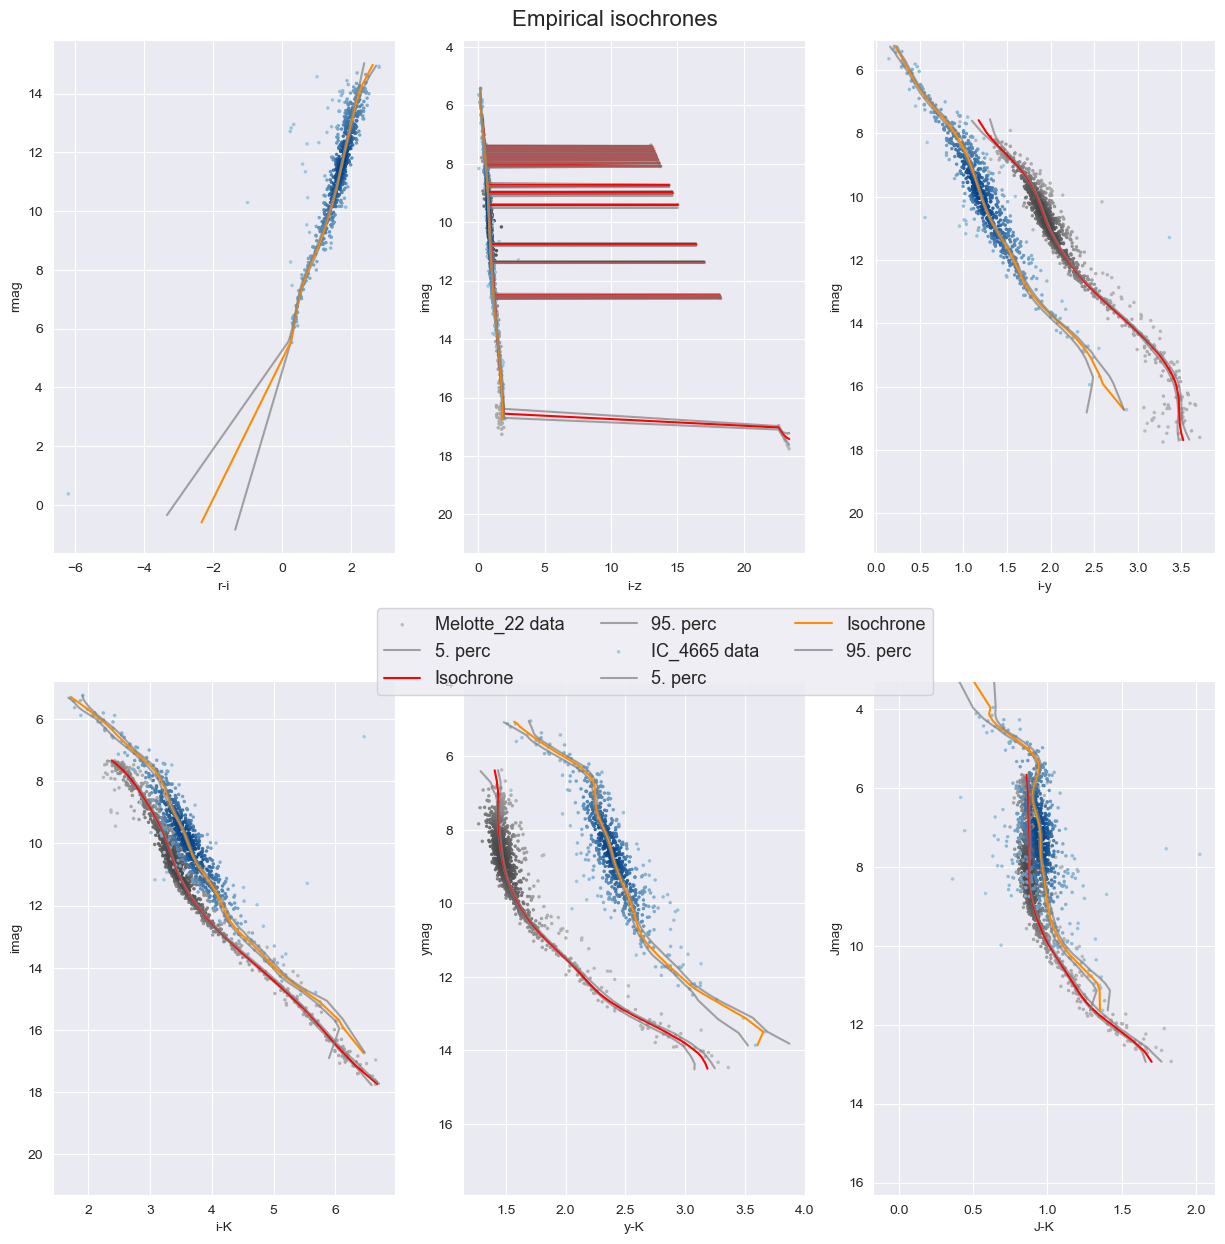

In [8]:
from_color = [[0.74, 0.74, 0.74],[0.62, 0.79, 0.88],[0.72,0.78,0.71]]
to_color =[[0.27, 0.27, 0.27],[0.0, 0.25, 0.53],[0.17,0.36,0.25]]

fig1 = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for k,filters in enumerate(CMD_combis[:]):
    for i, cluster in enumerate(case_study_names[:]):
        try:
            OC = star_cluster(cluster, N_df)
            OC.create_CMD(CMD_params=filters)
            #filtered_CMD = OC.CMD[OC.CMD[:,1] > cuts[i][k]]

            try:
                params = OC.SVR_read_from_file(HP_file)
            except IndexError:
                curve, isochrone = OC.curve_extraction(OC.PCA_XY, **kwargs)

            n_boot = 100
            result_df = OC.isochrone_and_intervals(n_boot=n_boot, kwargs=kwargs)

            OC_density_x, OC_density_y, OC_kwargs = CMD_density_design(OC.CMD, to_RBG=to_color[i], from_RBG=from_color[i], density_plot=False)
            axes[k].scatter(OC_density_x, OC_density_y, label="{} data".format(OC.name), **OC_kwargs)
            axes[k].plot(result_df["l_x"], result_df["l_y"], color="grey", label="5. perc", alpha=0.7)
            axes[k].plot(result_df["m_x"], result_df["m_y"], color=colors[i], label="Isochrone")
            axes[k].plot(result_df["u_x"], result_df["u_y"], color="grey", label="95. perc", alpha=0.7)

            ymin, ymax = axes[k].get_ylim()
            if i==0:
                axes[k].set_ylim(ymax+3, ymin-2)

            axes[k].set_ylabel(OC.CMD_specs["axes"][0])
            axes[k].set_xlabel(OC.CMD_specs["axes"][1])
            h=+1
            # ax2.legend(loc="best", fontsize=16)
        except ValueError:
            print(cluster, filters, "Value Error")
            h=+1

plt.subplots_adjust(hspace=0.25)
plt.suptitle("Empirical isochrones", fontsize = 16, y = 0.9)
plt.legend(bbox_to_anchor=(-0.8,0.16,1, 1), loc="upper right", ncol =3, fontsize = 13)

#fig1.savefig(output_path+"All_filters_data.png", dpi = 500)

#### Only isochrones

Keyerror, plx errors are missing!!
Melotte_22 ['rmag', 'rmag', 'imag'] Value Error
Keyerror, plx errors are missing!!


/Users/alena/PycharmProjects/PaperI/Classfile.py:155: RuntimeWarning: divide by zero encountered in divide
  weights = (1 / cax_error(delta_c1, delta_c2)).reshape(len(delta_c1), 1)


1.5964019298553467 s parallel
Keyerror, plx errors are missing!!
3.2152371406555176 s parallel
Keyerror, plx errors are missing!!
1.3165969848632812 s parallel
Keyerror, plx errors are missing!!
1.864759922027588 s parallel
Keyerror, plx errors are missing!!
1.3691811561584473 s parallel
Keyerror, plx errors are missing!!
3.267185926437378 s parallel
Keyerror, plx errors are missing!!
2.0687549114227295 s parallel
Keyerror, plx errors are missing!!
1.6136603355407715 s parallel
Keyerror, plx errors are missing!!
1.7338831424713135 s parallel
Keyerror, plx errors are missing!!
1.5403172969818115 s parallel
Keyerror, plx errors are missing!!
1.2271220684051514 s parallel


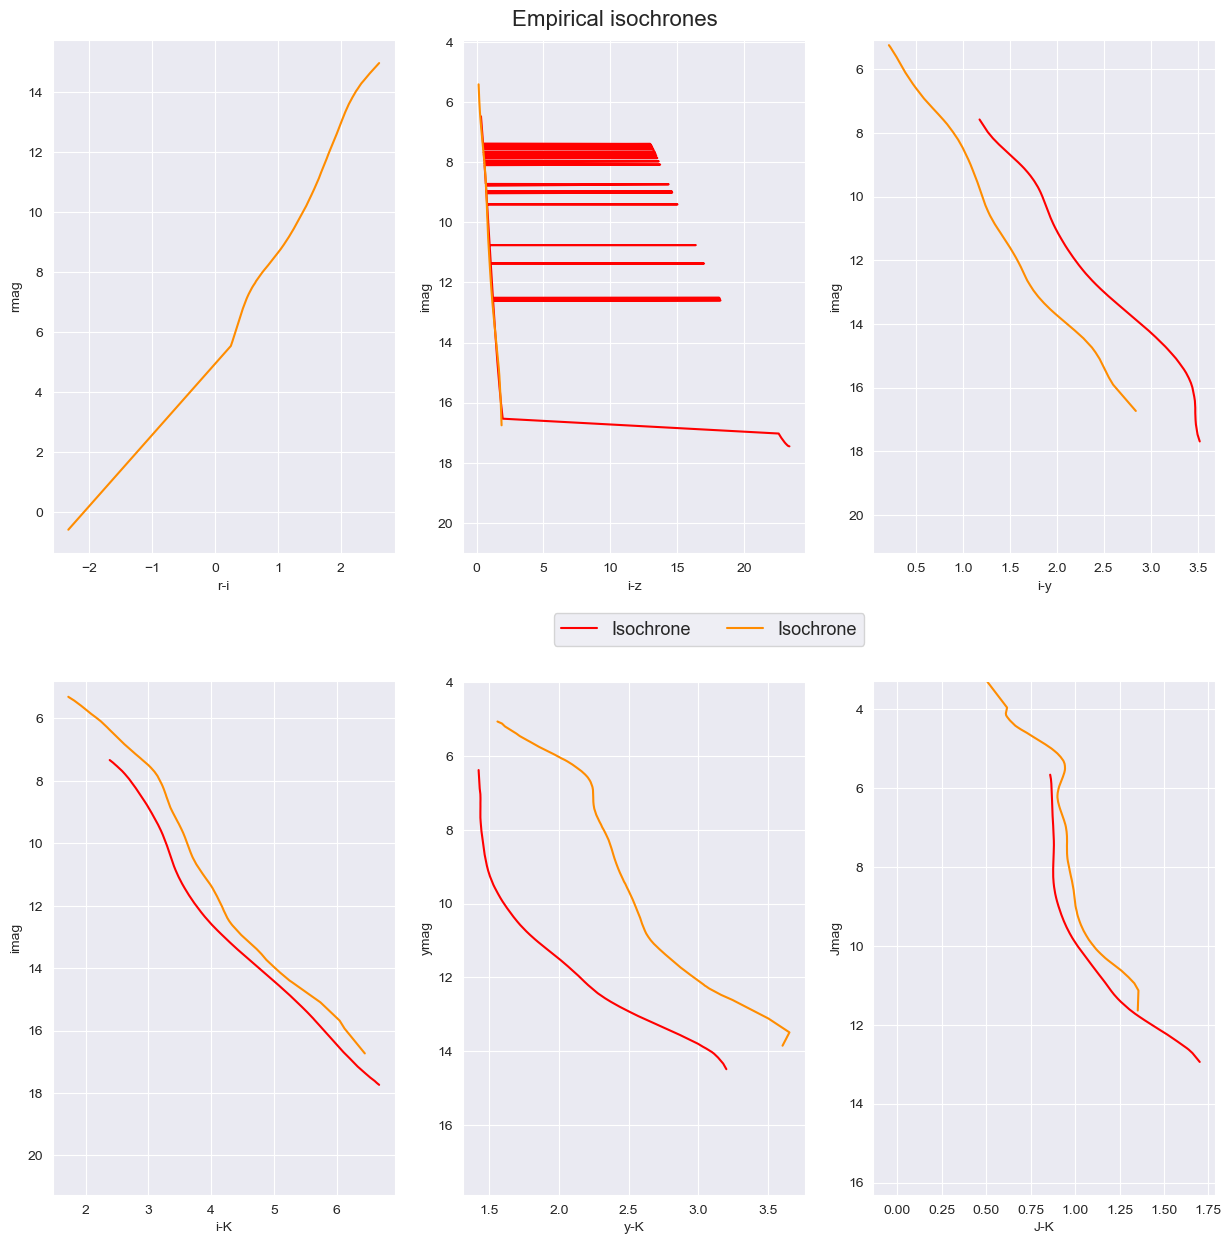

In [9]:
sns.set_style("darkgrid")
colors = ["red", "darkorange", "purple"]

from_color = [[0.74, 0.74, 0.74],[0.62, 0.79, 0.88],[0.72,0.78,0.71]]
to_color =[[0.27, 0.27, 0.27],[0.0, 0.25, 0.53],[0.17,0.36,0.25]]

fig2 = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for k,filters in enumerate(CMD_combis[:]):
    for i, cluster in enumerate(case_study_names[:]):
        try:
            OC = star_cluster(cluster, N_df)
            OC.create_CMD(CMD_params=filters)
            #filtered_CMD = OC.CMD[OC.CMD[:,1] > cuts[i][k]]

            try:
                params = OC.SVR_read_from_file(HP_file)
            except IndexError:
                curve, isochrone = OC.curve_extraction(OC.PCA_XY, **kwargs)

            n_boot = 100
            result_df = OC.isochrone_and_intervals(n_boot=n_boot, kwargs=kwargs)

            OC_density_x, OC_density_y, OC_kwargs = CMD_density_design(OC.CMD, to_RBG=to_color[i], from_RBG=from_color[i], density_plot=False)
            #axes[k].scatter(OC_density_x, OC_density_y, label="{} data".format(OC.name), **OC_kwargs)
            #axes[k].plot(result_df["l_x"], result_df["l_y"], color="grey", label="5. perc", alpha=0.7)
            axes[k].plot(result_df["m_x"], result_df["m_y"], color=colors[i], label="Isochrone")
            #axes[k].plot(result_df["u_x"], result_df["u_y"], color="grey", label="95. perc", alpha=0.7)

            ymin, ymax = axes[k].get_ylim()
            if i==0:
                axes[k].set_ylim(ymax+3, ymin-2)

            axes[k].set_ylabel(OC.CMD_specs["axes"][0])
            axes[k].set_xlabel(OC.CMD_specs["axes"][1])
            h=+1
            # ax2.legend(loc="best", fontsize=16)
        except ValueError:
            print(cluster, filters, "Value Error")
            h=+1

plt.subplots_adjust(hspace=0.25)
plt.suptitle("Empirical isochrones", fontsize = 16, y = 0.9)
plt.legend(bbox_to_anchor=(-1,0.15,1, 1), loc="upper right", ncol =3, fontsize = 13)

#fig2.savefig(output_path+"All_filters.png", dpi = 500)


#### NGC 2168
#### only new cluster

### Old parameters